In [1]:
# Import libraries
import pandas as pd
import json 
import os
from glob import glob
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import numpy as np
import math
from tabulate import tabulate
from IPython.display import display

/mnt/home/shahban1/MultiObjectivePrediction/MOO_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
# Read all data and save to dataframe df

# rdirs = ['/mnt/scratch/shahban1/MOO_multiple_refs/Lexicase', '/mnt/scratch/shahban1/MOO_multiple_refs/NSGA2', '/mnt/scratch/shahban1/MOO_multiple_dynamic/Lexicase',
#          '/mnt/scratch/shahban1/MOO_multiple_semi-dynamic/Lexicase', '/mnt/scratch/shahban1/MOO_multiple_constant/Lexicase' ]
rdirs = ['/mnt/scratch/shahban1/MOO_new_antagonistic/NSGA2' ,'/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/NSGA2', '/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover_low_mu/NSGA2']
# rdirs = ['/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/NSGA2', '/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/lex_std', '/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/lex_const',
#             '/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/lex_dyn', '/mnt/scratch/shahban1/MOO_new_antagonistic_no_xover/lex_semi']

frames = []
for rdir in rdirs:            
    for f in tqdm(glob('/'.join([rdir,'*.json']))):
        with open(f, 'r') as of:
            data = json.load(of)
            # if 'alg' in data:
            #     data['alg_name'] = 'NSGA2_old'
            #     data['IGD_corners'] = data['IGD_corner']
            #     data['IGD_middles']  = data['IGD_middle']
            if 'xover' in f:
                data['alg_name'] = 'NSGA2_no_xover'
            if 'low_mu' in f:
                data['alg_name'] = 'NSGA2_no_xover_low_mu'
            frames.append(data)

df = pd.DataFrame(frames)
#assert len(df) == len(rdirs)*2000
df

100%|██████████| 2000/2000 [00:00<00:00, 2704.06it/s]


,alg_name,S,dim,n_gen,diagnostic,L,GD_corners,IGD_corners,GD_middles,IGD_middles,GD_zeros,IGD_zeros,GD_ints,IGD_ints,spacing,pf_size,damp,seed,rdir
0,NSGA2,200,100,100,antagonistic,10,57.855483,19.866003,89.757223,9.973581,138.575459,48.441907,51.901977,18.940857,18.508548,200,1.0,16695,/mnt/scratch/shahban1/MOO_new_antagonistic/
1,NSGA2,400,15,100,antagonistic,10,18.592336,0.592244,23.618358,3.264499,38.438728,0.419115,11.062164,2.275747,10.091291,400,1.0,16695,/mnt/scratch/shahban1/MOO_new_antagonistic/
2,NSGA2,500,50,100,antagonistic,10,34.140768,11.547863,47.203193,7.764277,77.415519,8.965432,22.902459,7.904757,15.244091,500,1.0,6654,/mnt/scratch/shahban1/MOO_new_antagonistic/
3,NSGA2,300,5,100,antagonistic,10,10.998153,0.018745,12.532642,1.306609,20.668557,0.290332,7.419948,0.872139,2.302450,300,1.0,31658,/mnt/scratch/shahban1/MOO_new_antagonistic/
4,NSGA2,300,25,100,antagonistic,10,24.153109,3.806113,31.076521,6.147311,50.350471,1.663638,14.255661,4.816375,13.366913,300,1.0,8233,/mnt/scratch/shahban1/MOO_new_antagonistic/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,NSGA2_no_xover_low_mu,700,5,100,antagonistic,10,11.204111,0.000087,12.771469,1.376781,21.120368,0.741629,7.763426,0.986575,1.076045,700,1.0,12092,/mnt/scratch/shahban1/MOO_new_antagonistic_no_...
5996,NSGA2_no_xover_low_mu,900,5,100,antagonistic,10,11.045885,0.000084,12.813262,0.657441,21.238371,0.557319,7.832887,0.668623,0.985333,900,1.0,1318,/mnt/scratch/shahban1/MOO_new_antagonistic_no_...
5997,NSGA2_no_xover_low_mu,300,175,100,antagonistic,10,586.925206,534.733454,652.131740,599.827579,717.510361,665.128845,586.925206,593.383866,9.044689,300,1.0,4866,/mnt/scratch/shahban1/MOO_new_antagonistic_no_...
5998,NSGA2_no_xover_low_mu,900,75,100,antagonistic,10,72.766120,20.934738,112.843861,49.252879,155.108521,90.350890,72.766120,47.595533,4.773274,900,1.0,10197,/mnt/scratch/shahban1/MOO_new_antagonistic_no_...


In [38]:
df.groupby(['alg_name','S','dim'])['seed'].nunique().unstack()
# df['alg'].value_counts()
# df['S'].value_counts()
# df['dim'].value_counts()
# df['seed'].value_counts()
# df['epsilon_type'].value_counts()
# df['epsilon'].value_counts()


dim                         5    15   25   50   75   100  125  150  175  200
alg_name              S                                                     
NSGA2                 100    20   20   20   20   20   20   20   20   20   20
                      200    20   20   20   20   20   20   20   20   20   20
                      300    20   20   20   20   20   20   20   20   20   20
                      400    20   20   20   20   20   20   20   20   20   20
                      500    20   20   20   20   20   20   20   20   20   20
                      600    20   20   20   20   20   20   20   20   20   20
                      700    20   20   20   20   20   20   20   20   20   20
                      800    20   20   20   20   20   20   20   20   20   20
                      900    20   20   20   20   20   20   20   20   20   20
                      1000   20   20   20   20   20   20   20   20   20   20
NSGA2_no_xover        100    20   20   20   20   20   20   20   20   20   20
                      200    20   20   20   20   20   20   20   20   20   20
                      300    20   20   20   20   20   20   20   20   20   20
                      400    20   20   20   20   20   20   20   20   20   20
                      500    20   20   20   20   20   20   20   20   20   20
                      600    20   20   20   20   20   20   20   20   20   20
                      700    20   20   20   20   20   20   20   20   20   20
                      800    20   20   20   20   20   20   20   20   20   20
                      900    20   20   20   20   20   20   20   20   20   20
                      1000   20   20   20   20   20   20   20   20   20   20
NSGA2_no_xover_low_mu 100    20   20   20   20   20   20   20   20   20   20
                      200    20   20   20   20   20   20   20   20   20   20
                      300    20   20   20   20   20   20   20   20   20   20
                      400    20   20   20   20   20   20   20   20   20   20
                      500    20   20   20   20   20   20   20   20   20   20
                      600    20   20   20   20   20   20   20   20   20   20
                      700    20   20   20   20   20   20   20   20   20   20
                      800    20   20   20   20   20   20   20   20   20   20
                      900    20   20   20   20   20   20   20   20   20   20
                      1000   20   20   20   20   20   20   20   20   20   20

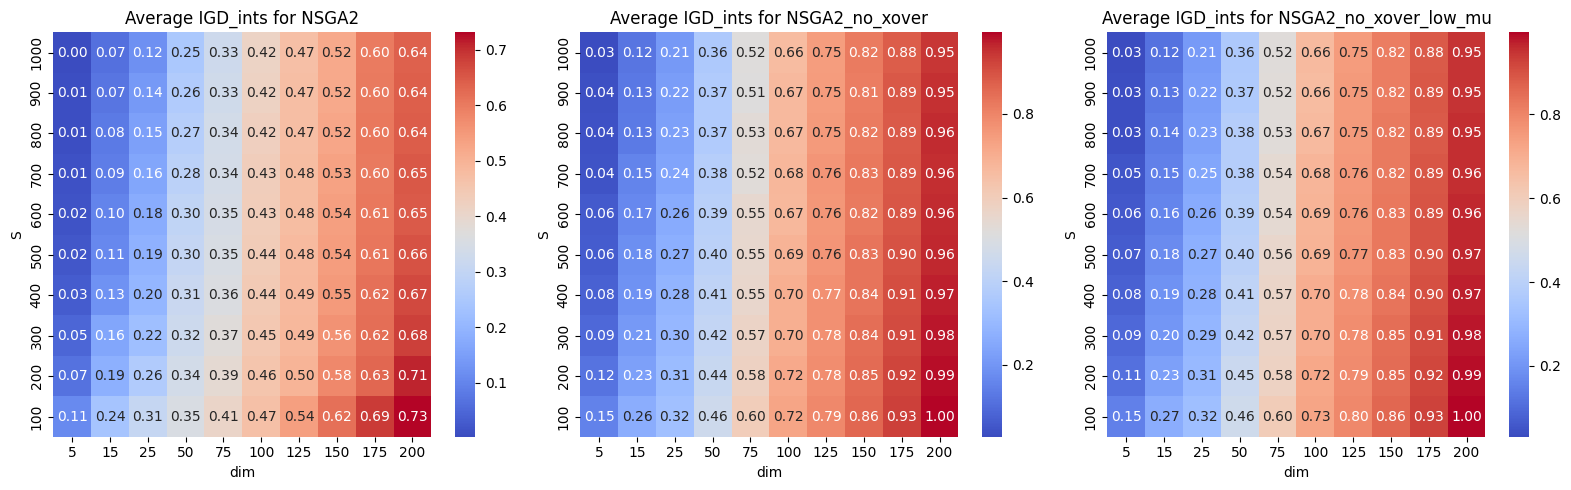

In [40]:
# Heatmaps

def scale_data(df, metric):
    # Scale data using min_max method
    scaler = MinMaxScaler()
    df[metric] = scaler.fit_transform(df[[metric]])
    return df

def scale_data_quantile(df, metric):
    # Normalize data to a uniform or normal distribution
    scaler = QuantileTransformer(output_distribution='uniform', random_state=42)
    df[metric] = scaler.fit_transform(df[[metric]])
    return df

def prepare_heatmap_data(data, metric):
    # Prepares pivot table data for heatmap generation.
    heatmap_data = data.groupby(['S', 'dim'])[metric].mean().reset_index()
    return heatmap_data.pivot_table(index='S', columns='dim', values=metric)

def plot_heatmap(pivot_data, ax, title, xlabel='dim', ylabel='S'):
    # Plots a heatmap on the given axis.
    sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)
    ax.invert_yaxis()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

metric = 'IGD_ints' # Choose the metric you want to analyze
#df_plot = df.copy() # Use this if you want to see actual values
df_plot = scale_data_quantile(df.copy(), metric) # Use this if you want to see scaled values

# Group data based on algorithm
data_subsets = {
    #'Lexicase': df_plot[(df_plot['alg_name'] == 'lex_std')],
    # 'Constant Lexicase': df_plot[(df_plot['alg_name'] == 'lex_const')],
    # 'Semi-dynamic Lexicase': df_plot[(df_plot['alg_name'] == 'lex_semi')],
    # 'Dynamic Lexicase': df_plot[(df_plot['alg_name'] == 'lex_dyn')],
    'NSGA2': df_plot[(df_plot['alg_name'] == 'NSGA2')],
    'NSGA2_no_xover': df_plot[(df_plot['alg_name'] == 'NSGA2_no_xover')],
    'NSGA2_no_xover_low_mu': df_plot[(df_plot['alg_name'] == 'NSGA2_no_xover_low_mu')]
}

# print(len(data_subsets['Lexicase']))
# print(len(data_subsets['NSGA2']))

# Make pivot tables for each algorithm
pivot_tables = {key: prepare_heatmap_data(data, metric) for key, data in data_subsets.items()}

# Plot heatmaps
cols = 3
rows = math.ceil(len(pivot_tables) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

for ax, (key, pivot_data) in zip(axes, pivot_tables.items()):
    plot_heatmap(pivot_data, ax, f'Average {metric} for {key}')

plt.tight_layout()
plt.show()


20


<Axes: xlabel='IGD_ints', ylabel='Count'>

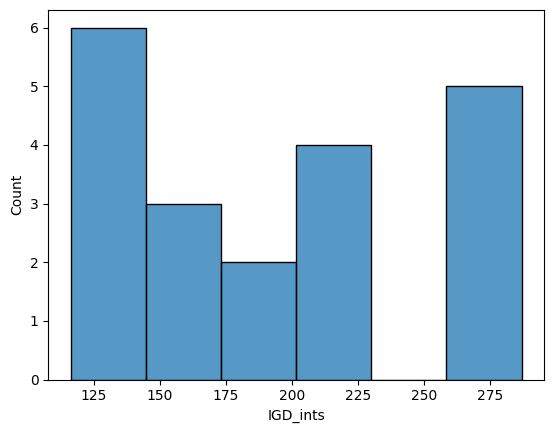

In [4]:
# Look at the distribution of a specific metric for a specific experiment
target_alg = 'Lexicase'
target_epsilon_type = 'dynamic'
target_S = 100
target_dim = 200
target_seed = 6832
target_data = df[(df['alg'] == target_alg) & (df['S'] == target_S) & (df['dim'] == target_dim) & (df['epsilon_type'] == target_epsilon_type)]

# Distribution of metrics
print(len(target_data))
sns.histplot(target_data['IGD_ints'])


In [51]:
# Function to read population data

def find_experiment(target_S, target_dim, target_alg, target_seed, path):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            parts = filename.split('-')
            try:
                # Extract values from the filename
                algorithm = parts[1]
                S_value = int(parts[3])
                dim_value = int(parts[5])
                seed_value = int(parts[7].split('.')[0])
                
                # Check if they match the target values
                if S_value == target_S and dim_value == target_dim and algorithm == target_alg and seed_value == target_seed:
                    #print(f"Found file: {filename}")
                    with open(os.path.join(path, filename), 'r') as of:
                        data = json.load(of)
                        return data
            except (IndexError, ValueError):
                continue


In [72]:
# Look at population data
path = '/mnt/scratch/shahban1/MOO_new_antagonistic/lex_std/experiment'
target_alg = 'lex_std'
#target_epsilon_type = 'dynamic' # this doesn't matter cause different epsilon types are in different folders
target_S = 100
target_dim = 200
target_seed = 6832

data = find_experiment(target_S, target_dim, target_alg, target_seed, path)
F = np.array(data['F'])
opt_F = np.array(data['opt_F'])
X = np.array(data['X'])
opt_X = np.array(data['opt_X'])
print('population size: ', len(F))
print('number of solutions on pf: ', len(opt_F))
#print(sum(opt_X[0]))

# from pymoo.visualization.star_coordinate import StarCoordinate
# StarCoordinate().add(opt_F).show()


population size:  100
number of solutions on pf:  78


In [73]:
# Continued: Look at a population in table format and highlight solutions

population = X
print(len(opt_X))
# check if an individual is in opt_F
def is_pareto_optimal(individual, opt_X):
    return any(np.allclose(individual, opt, atol=1e-8) for opt in opt_X)

# Make F a dataframe 
tbl = pd.DataFrame(population, columns=[f"Dim {i+1}" for i in range(F.shape[1])])

# Highlight solution yellow
def style_population(row):

    styles = []
    individual = row.values

    if is_pareto_optimal(individual, opt_X):
        styles = ['background-color: yellow; color: black'] * len(row) 
        #styles = [''] * len(row)
    else:
        styles = [''] * len(row)
    
    # Highlight individual cells red if they are negative
    for i, value in enumerate(row):
        if value > 9:
            styles[i] = 'background-color: red'
    return styles


#styled_df = tbl.style.apply(style_population, axis=1).format("{:.2f}")
#styled_df.to_html('lex_S_100_dim_200.html')
#display(styled_df)



78


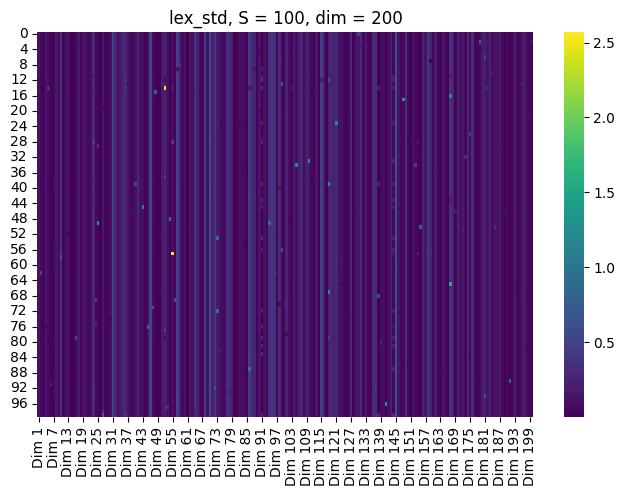

In [74]:
# Continued: Look at population in heatmap format
plt.figure(figsize=(8, 5))  
sns.heatmap(tbl, cmap="viridis", annot=False) 
plt.title(f'{target_alg}, S = {target_S}, dim = {target_dim}')
plt.show()


In [60]:
# Count the number of specialists found for a specific experiment

# def is_solution(individual):
#     # Define a specialist solution
#     if any(val > 9 for val in individual):
#         if all(0 <= val <= 1 for val in individual if val <= 9):
#             return True
#         else:
#             return False

def is_solution(individual):
    if any(val == 10 for val in individual) and (sum(individual) == 10):
        return True

def count_specialists(population):
    specialists = 0
    for individual in population:
        if is_solution(individual):
            specialists += 1
    return specialists

paths = ['/mnt/scratch/shahban1/MOO_new_antagonistic/NSGA2']
frames_success = []
for path in paths:            
    for f in tqdm(glob('/'.join([path,'*.json']))):
        with open(f, 'r') as of:
            data = json.load(of)
            frames_success.append(data)

df_success = pd.DataFrame(frames_success)
print(df_success)

for idx, row in df_success.iterrows():
    S = row['S']
    dim = row['dim']
    seed = row['seed']
    alg = row['alg_name']
    #epsilon_type = row['epsilon_type']
    pop_data = find_experiment(S, dim, alg, seed, paths[0]+'/experiment')
    df_success.at[idx, 'specialists'] = count_specialists(pop_data['opt_X']) # Actual number of specialists
    df_success.at[idx, 'specialists_norm'] = count_specialists(pop_data['opt_X'])/row['pf_size'] # Normalized number of specialists depending on pf size

print("Done!")     

100%|██████████| 2000/2000 [00:00<00:00, 2786.07it/s]


     alg_name    S  dim  n_gen    diagnostic   L  GD_corners  IGD_corners  \
0       NSGA2  200  100    100  antagonistic  10   57.855483    19.866003   
1       NSGA2  400   15    100  antagonistic  10   18.592336     0.592244   
2       NSGA2  500   50    100  antagonistic  10   34.140768    11.547863   
3       NSGA2  300    5    100  antagonistic  10   10.998153     0.018745   
4       NSGA2  300   25    100  antagonistic  10   24.153109     3.806113   
...       ...  ...  ...    ...           ...  ..         ...          ...   
1995    NSGA2  400  125    100  antagonistic  10   76.874424    19.523086   
1996    NSGA2  900  150    100  antagonistic  10   99.549356    19.662397   
1997    NSGA2  400  175    100  antagonistic  10  154.292734    22.303124   
1998    NSGA2  800  200    100  antagonistic  10  194.776441    53.399772   
1999    NSGA2  600   75    100  antagonistic  10   43.859243    14.695455   

      GD_middles  IGD_middles    GD_zeros   IGD_zeros     GD_ints    IGD_in

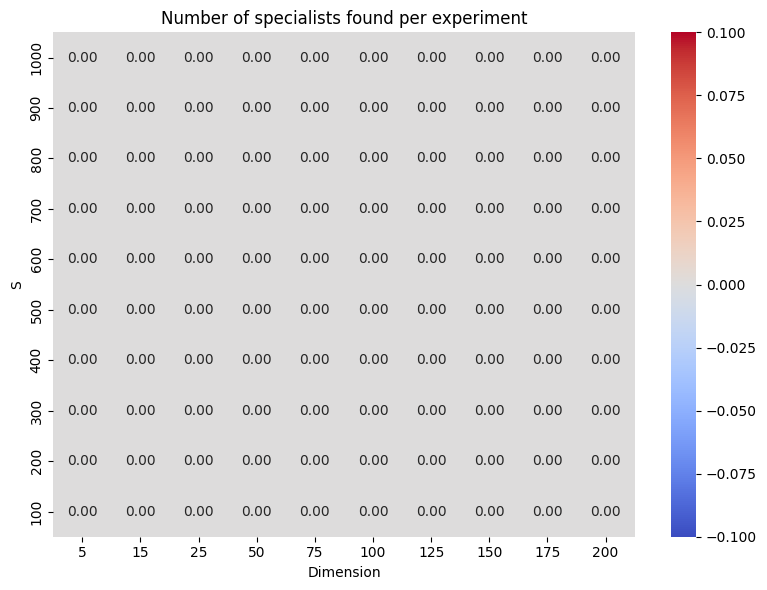

In [61]:
# Continued: Plot heatmap of number of specialists found per experiment

pivot_table_success = df_success.pivot_table(index='S', columns='dim', values='specialists', aggfunc='mean')

plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
ax = sns.heatmap(pivot_table_success, cmap='coolwarm', annot=True, fmt=".2f")
ax.invert_yaxis()  # Invert y-axis for proper display
ax.set_title('Number of specialists found per experiment')
ax.set_xlabel('Dimension')  # Corrected typo
ax.set_ylabel("S")

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



ValueError: zero-size array to reduction operation fmin which has no identity

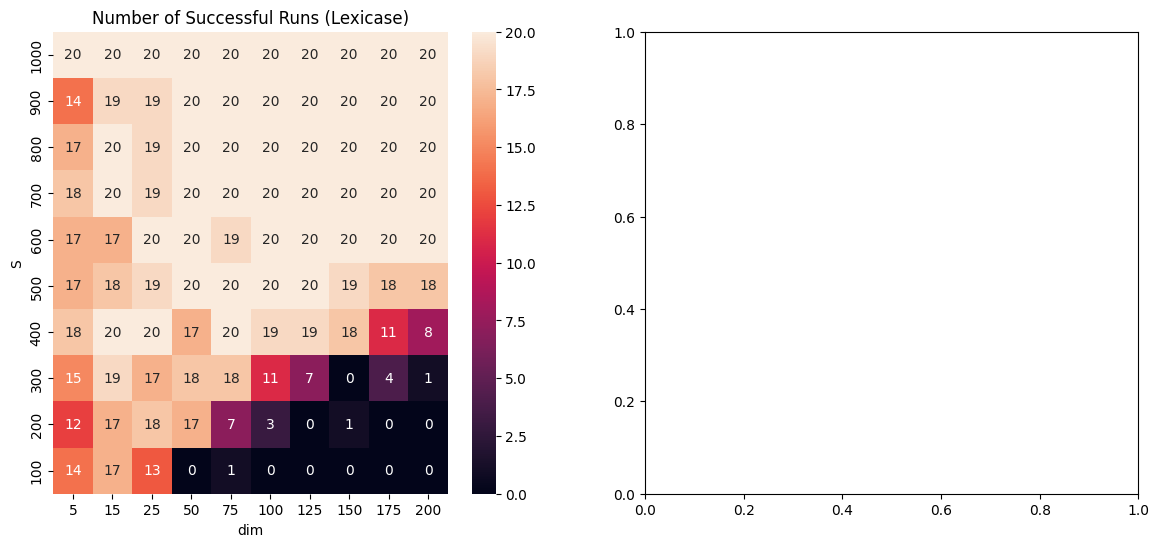

In [55]:
# Filter for Lexicase
df_lexicase = df_success[df_success['alg'] == 'Lexicase']
heatmap_lexicase = (
    df_lexicase[df_lexicase['success'] == True]
    .groupby(['S', 'dim'])['success']
    .count()
    .reset_index()
    .pivot(index='S', columns='dim', values='success')
    .fillna(0) 
)

# # Filter for NSGA2
# df_nsga2 = df_success[df_success['alg'] == 'NSGA2']
# heatmap_nsga2 = (
#     df_nsga2[df_nsga2['success'] == True]
#     .groupby(['S', 'dim'])['success']
#     .count()
#     .reset_index()
#     .pivot(index='S', columns='dim', values='success')
#     .fillna(0) 
# )

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.heatmap(heatmap_lexicase, annot=True, cbar=True, ax=axes[0])
ax1.set_title("Number of Successful Runs (Lexicase)")
ax1.invert_yaxis()
ax1.set_xlabel("dim")
ax1.set_ylabel("S")

# ax2 = sns.heatmap(heatmap_nsga2, annot=True, cbar=True, ax=axes[1])
# ax2.set_title("Number of Successful Runs (NSGA2)")
# ax2.invert_yaxis()
# ax2.set_xlabel("dim")
# ax2.set_ylabel("S")

plt.tight_layout()
plt.show()


In [80]:
s = 200
d = 200
(1 - (0.5)**(1/s)) <= (1/d)

True